<a href="https://colab.research.google.com/github/trang-ly/eda-nasa-ps/blob/main/eda_nasa_ps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA) of NASA Exoplanet Planetary Systems**

This research has made use of the NASA Exoplanet Archive, which is operated by the California Institute of Technology, under contract with the National Aeronautics and Space Administration under the Exoplanet Exploration Program.

# Introduction

The discovery of exoplanets—planets orbiting stars outside our solar system—has revolutionized our understanding of the universe. With advancements in astronomical techniques and technology, thousands of exoplanets have been identified, each providing valuable insights into planetary formation, evolution, and potential habitability. The NASA Exoplanet Archive serves as a comprehensive repository of these discoveries, housing detailed information about various planetary systems.

This exploratory data analysis (EDA) delves into the NASA Exoplanet Planetary Systems dataset to:

*   Understand the distribution and trends in exoplanet discoveries over time.
*   Analyze the methods used for discovering exoplanets.
*   Examine the relationships between key exoplanetary and stellar parameters.

By visualizing and interpreting this data, I aim to uncover insights into the mechanisms behind exoplanet discovery and the characteristics of planetary systems beyond our own. The analysis will involve a series of plots and statistical summaries to highlight significant patterns and trends within the dataset.

# Analysis

0. Data Collection

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from scipy.stats import linregress

In [14]:
# Define TAP URL with query
url = ("https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,discoverymethod,"
       "disc_year,pl_orbper,pl_orbsmax,pl_radj,pl_massj,st_spectype,st_teff,st_rad,st_mass+from+ps&format=csv")

# GET request
response = requests.get(url)

# Save data to a CSV file
csv_file = "planetary_systems_data.csv"

# Check if the request was successful
if response.status_code == 200:
    with open(csv_file, "w") as file:
        file.write(response.text)
    print(f"Data saved to {csv_file}.")
else:
    print(f"Failed to get data: {response.status_code}.")

Data saved to planetary_systems_data.csv.


In [15]:
# Load the data into a pandas DataFrame
df = pd.read_csv(csv_file)

# Display the first few rows
print(df.head())

# Check for missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({"Missing Values": missing_data, "Percentage": missing_percentage})
print(missing_info)

# Summary statistics
print(df.describe())

        pl_name    hostname  discoverymethod  disc_year     pl_orbper  \
0  OGLE-TR-10 b  OGLE-TR-10          Transit       2004      3.101278   
1  BD-08 2823 b  BD-08 2823  Radial Velocity       2009      5.600000   
2  BD-08 2823 c  BD-08 2823  Radial Velocity       2009    237.600000   
3     HR 8799 c     HR 8799          Imaging       2008  69000.000000   
4   HD 104985 b   HD 104985  Radial Velocity       2003    198.200000   

   pl_orbsmax  pl_radj  pl_massj st_spectype  st_teff  st_rad  st_mass  
0      0.0434     1.25      0.62         NaN  5950.00    1.17     1.14  
1      0.0560      NaN       NaN        K3 V  4746.00     NaN     0.74  
2      0.6800      NaN       NaN        K3 V  4746.00     NaN     0.74  
3     38.0000     1.20     10.00        A5 V      NaN     NaN     1.50  
4      0.7800      NaN       NaN         NaN  4679.37   11.63      NaN  
                 Missing Values  Percentage
pl_name                       0    0.000000
hostname                      0    

1. Distribution of Exoplanet Discoveries by Year

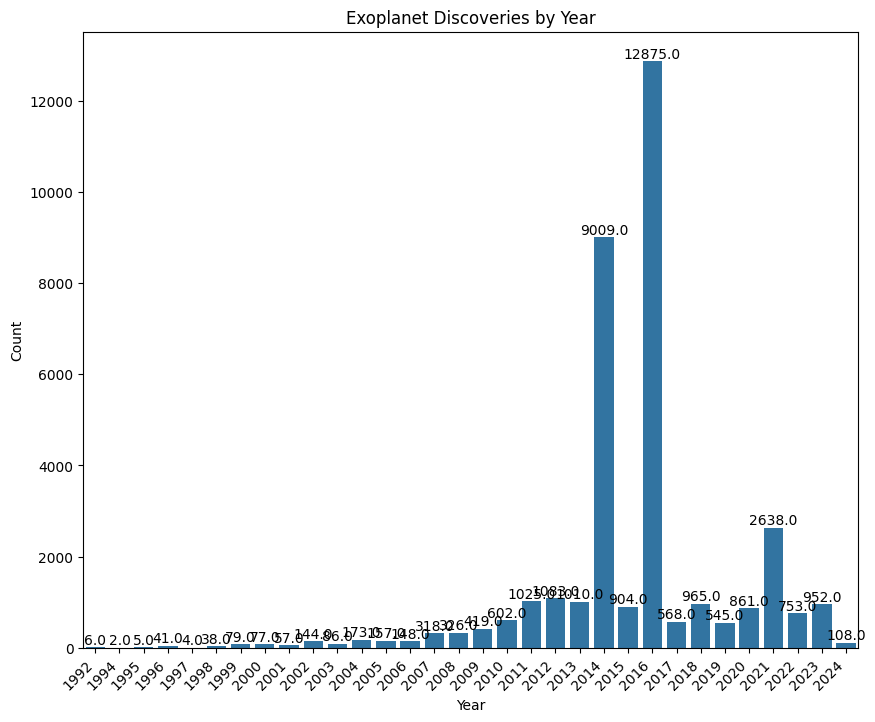

In [42]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="disc_year", data=df)
plt.title("Exoplanet Discoveries by Year")
plt.xlabel("Year")
plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom")

plt.xticks(rotation=45, ha="right")
plt.show()

This bar chart shows the number of exoplanet discoveries per year. Each bar represents a different year, and the height of the bar indicates the number of exoplanets discovered in that year.

2. Most Common Discovery Method by Year

In [17]:
# Group data by year and discovery method, and count occurrences
year_method_counts = df.groupby(["disc_year", "discoverymethod"]).size().reset_index(name="count")

# Find the most common discovery method for each year
most_common_method = year_method_counts.loc[year_method_counts.groupby("disc_year")["count"].idxmax()]

# Create a DataFrame with the most common discovery method for each year
table_data = {
    "Year": most_common_method["disc_year"],
    "Most Common Method": most_common_method["discoverymethod"],
    "Count": most_common_method["count"]
}
table_df = pd.DataFrame(table_data)
# Display the DataFrame as a table
print(table_df)

# Calculate the total count
total_count = table_df["Count"].sum()

# Print the total count
print("Total Count:", total_count)

     Year Most Common Method  Count
0    1992      Pulsar Timing      6
1    1994      Pulsar Timing      2
2    1995    Radial Velocity      5
3    1996    Radial Velocity     41
4    1997    Radial Velocity      4
5    1998    Radial Velocity     38
6    1999    Radial Velocity     79
7    2000    Radial Velocity     77
8    2001    Radial Velocity     57
9    2002    Radial Velocity    134
12   2003    Radial Velocity     85
15   2004    Radial Velocity    112
19   2005    Radial Velocity    149
22   2006    Radial Velocity     72
27   2007            Transit    192
31   2008            Transit    180
35   2009            Transit    224
40   2010            Transit    472
47   2011            Transit    901
53   2012            Transit    971
60   2013            Transit    908
66   2014            Transit   8781
72   2015            Transit    779
77   2016            Transit  12738
84   2017            Transit    464
90   2018            Transit    835
97   2019            Transit

This table shows the most common discovery method for each year along with the count of exoplanets discovered using that method.

Insights:
*   Since 2007, the transit method has been the predominant means of exoplanet discovery, peaking at 12,738 total discoveries in 2016.
*   2016 and 2014 account for 21,519 out of 33,190 total discoveries, making up 64.8% of the total exoplanet discoveries from 1992 to 2024.

3. Cumulative Number of Exoplanet Detections per Year by Discovery Method

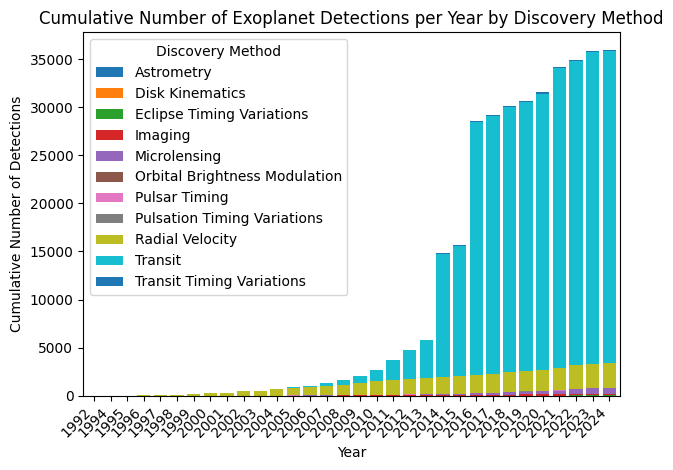

In [39]:
# Group the data by year and discovery method, then count the number of detections
cumulative_counts = df.groupby(["disc_year", "discoverymethod"]).size().unstack().fillna(0).cumsum()

cumulative_counts.plot(kind="bar", stacked=True, width=0.8)
plt.title("Cumulative Number of Exoplanet Detections per Year by Discovery Method")
plt.xlabel("Year")
plt.ylabel("Cumulative Number of Detections")
plt.legend(title="Discovery Method")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

The stacked bar chart provides a visual breakdown of the cumulative number of exoplanet detections by their respective discovery methods for each year. The height of each segment within a bar indicates the contribution of that particular method to the total number of discoveries in that year.

Insights:
*   By observing the changes in the distribution of colors within each bar over time, we can discern trends in the methods employed for exoplanet detection. This visualization helps in understanding the evolution and prevalence of different techniques used in the discovery of exoplanets across the years.



4. Orbital Period vs. Distance from Star

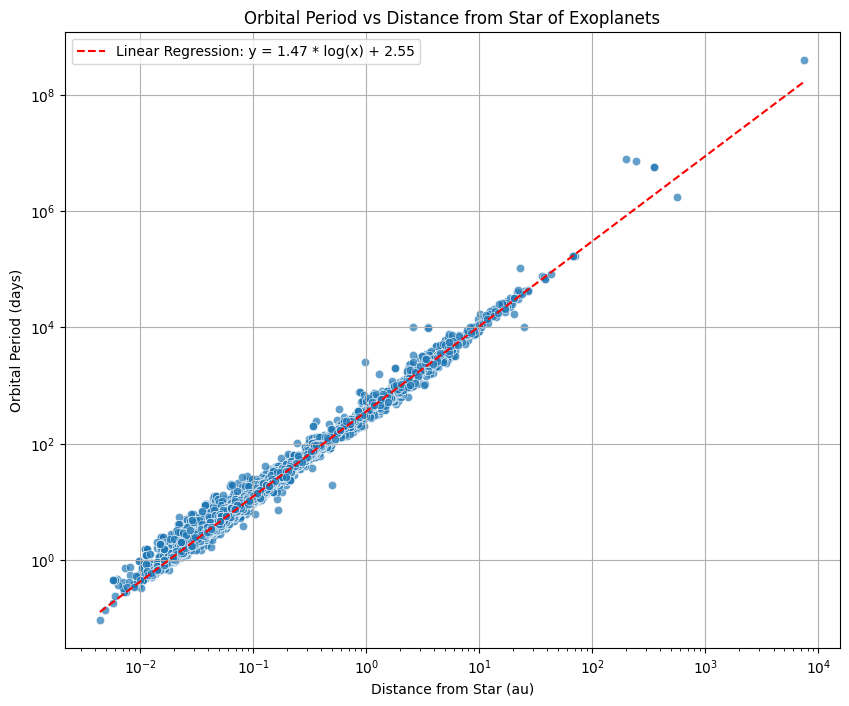

In [37]:
# Drop rows with missing values in the columns of interest
df_clean = df[["pl_orbsmax", "pl_orbper"]].dropna()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(np.log10(df_clean["pl_orbsmax"]),
                                                         np.log10(df_clean["pl_orbper"]))

# Create scatter plot of distance from star vs orbital period with logarithmic scale
plt.figure(figsize=(10, 8))
sns.scatterplot(x="pl_orbsmax", y="pl_orbper", data=df_clean, alpha=0.7)
plt.xscale("log")
plt.yscale("log")

# Plot linear regression line
x_values = np.linspace(df_clean["pl_orbsmax"].min(), df_clean["pl_orbsmax"].max(), 100)
y_values = 10**(slope * np.log10(x_values) + intercept)
plt.plot(x_values, y_values, color="red", linestyle="--", label=f"Linear Regression: "
                                                                f"y = {slope:.2f} * log(x) + {intercept:.2f}")
# Add labels and title
plt.title("Orbital Period vs Distance from Star of Exoplanets")
plt.xlabel("Distance from Star (au)")
plt.ylabel("Orbital Period (days)")
plt.grid(True)
plt.legend()

plt.show()

This scatter plot shows the relationship between the orbital period and the distance from the star for exoplanets, with a linear regression line to highlight the trend.

This plot helps in understanding the relationship between a planet's distance from its star and its orbital period. The log-log scale allows for a better visualization of the data over a wide range of values.

Insights:
*   By examining this chart, we can observe that there is a direct relationship between the orbital period and the distance from the star, which is consistent with **Kepler's Third Law of planetary motion** <sup>[1]</sup>. The linear regression line provides a quantitative measure of this relationship.

<sup>[1]</sup> NASA. (2008, June 26). Orbits and Kepler’s laws. NASA Science. https://science.nasa.gov/resource/orbits-and-keplers-laws/.



5. 3D Scatter Plot of Orbital Period, Distance from Star, and Planet Radius

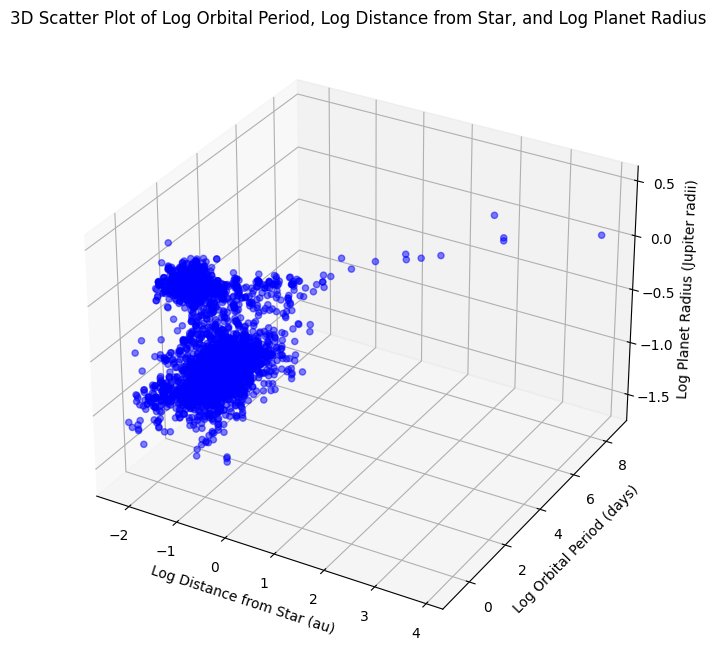

In [36]:
# Drop rows with missing values in the columns of interest
df_clean = df[["pl_orbsmax", "pl_orbper", "pl_radj"]].dropna()

# Create a 3D scatter plot of orbital period, distance from star, and planet radius with logarithmic scales
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Extract variables
x = df_clean["pl_orbsmax"]
y = df_clean["pl_orbper"]
z = df_clean["pl_radj"]

# Plot 3D scatter plot with logarithmic scales
ax.scatter(np.log10(x), np.log10(y), np.log10(z), c="b", marker="o", alpha=0.5)

# Set labels and title
ax.set_xlabel("Log Distance from Star (au)")
ax.set_ylabel("Log Orbital Period (days)")
ax.set_zlabel("Log Planet Radius (Jupiter radii)")
ax.set_title("3D Scatter Plot of Log Orbital Period, Log Distance from Star, and Log Planet Radius")

plt.show()

This 3D scatter plot shows the relationship between the orbital period, distance from the star, and planet radius, with all axes on a logarithmic scale.

Insights:
*   By examining this chart, we can observe clusters and trends that may not be apparent in 2D plots. For example, you might identify that larger planets (in terms of radius) tend to have longer orbital periods and are found at greater distances from their stars. This can lead to further investigation into the formation and evolution of planetary systems.

